In [5]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
import scipy.stats
from scipy.stats import ttest_ind,mannwhitneyu,wilcoxon
import seaborn as sns
sns.set(style="ticks",color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
#load data set URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width','petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)

df = pd.DataFrame(data)

X = df.drop('class',1)

print('X variable\n\n',X.head())

y = df['class']

print('y variable\n\n',y.head())
print('\n')

X variable

    sepal-length  sepal-width  petal-length  petal-width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
y variable

 0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object




In [8]:
#Pie chart
print("Data visualization\n")
def piechart(data):
    df1 = data.sample(20)
    explode=(0.2,0.1,0.1,0.3,0.2,0.2,0.2,0.1,0.3,0.2,0.2,0.1,0.1,0.3,0.2,0.2,0.2,0.1,0.3,0.2)
    print("Pie chart comparison\n")
    plt.pie(df1['sepal-length'], labels = df1['class'],explode = explode, startangle=45, autopct='%.1f%%')
    plt.show()
    print('\n')
    piechart(data)

Data visualization



Count plots


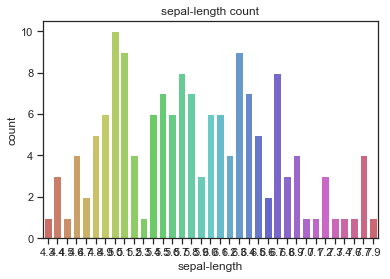

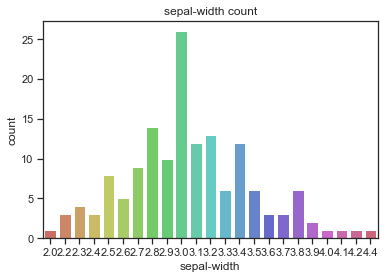

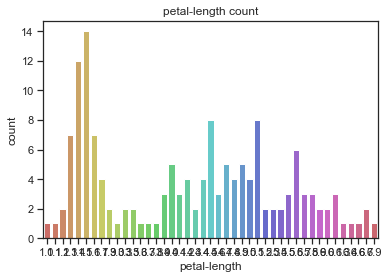

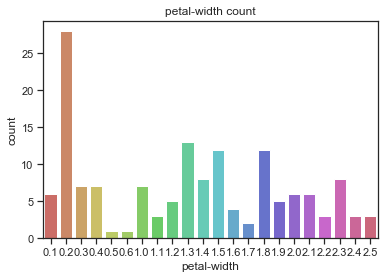

In [9]:
#Count plot
print('Count plots')
sns.countplot(x=df['sepal-length'],data=df, palette='hls')
plt.title('sepal-length count')
plt.show()
print('\n')

sns.countplot(x=df['sepal-width'],data=df, palette='hls')
plt.title('sepal-width count')
plt.show()
print('\n')

sns.countplot(x=df['petal-length'],data=df, palette='hls')
plt.title('petal-length count')
plt.show()
print('\n')

sns.countplot(x=df['petal-width'],data=df, palette='hls')
plt.title('petal-width count')
plt.show()
print('\n')

In [14]:
#Hypothesis
#Non parametric test(mann Whiteney test)
print('\n')
print('Hypothesis Testing\n')
print('Mann-Whiteney Test results')
data1 = df['sepal-length']
data2 = df['sepal-width']
stat, p = mannwhitneyu(data1, data2)
print('Statistics:',stat,'\n','p-value:',p)
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0 and accepting H1)')



Hypothesis Testing

Mann-Whiteney Test results
Statistics: 2.5 
 p-value: 4.89868480774315e-51
Different distribution (reject H0 and accepting H1)


In [16]:
#Wilcoxon test
print('\n')
print('Wilcoxson Test Results')
data1 = df['petal-length']
data2 = df['petal-width']
stat1, p1 = wilcoxon(data1, data2)
print('Statistics:',stat1,'\n','p-value:',p1)



Wilcoxson Test Results
Statistics: 0.0 
 p-value: 2.244265490032842e-26


In [18]:
# interpret the results
alpha = 0.05
if p1 > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0 and accepting H1)')


Different distribution (reject H0 and accepting H1)


In [19]:
#Split the data train and test
print('Support Vector Machine Results\n')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Support Vector Machine Results



In [20]:
#Support Vector machine classifier

svclassifier = SVC(kernel='linear')

#fit the model
svclassifier.fit(X_train, y_train)

#predict the test data
y_pred = svclassifier.predict(X_test)

#evaluating the algorithm

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n')
a = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score:',round(a,2))

train = svclassifier.score(X_train, y_train)
print('score of train data',round(train,2))

test = svclassifier.score(X_test, y_test)
print('score of test data',round(test,2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

      micro avg       0.98      0.98      0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


Accuracy score: 0.98
score of train data 0.98
score of test data 0.98
